# Demo of Build and Parameterize tools from SwiftPol

- Build a short linear co-polymer chain (PLGA)
- Use [Espaloma Charge](https://github.com/choderalab/espaloma) and [NAGL](https://github.com/openforcefield/openff-nagl) to assign charges to the SwiftPol chain, and compare values
- Use a Ring Opening Polymerisation scheme to build a PLGA chain
- Create a small SwiftPol PLGA ensemble, assign partial charges to the chain, and inspect the first chain in the system
- Solvate the PLGA ensemble with water, NaCl and 0.5% residual monomer
- Test the effect of a uniform and normal distribution on the chain length and % lactide of a SwiftPol PLGA ensemble
- Build a commercially available PLGA ensemble

In [23]:
# Print SwiftPol Version
from swiftpol.__version__ import __version__
__version__

'0.1.0'

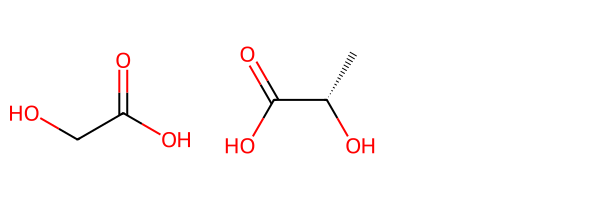

In [1]:
# Import monomers to build PLGA and visualise using RDkit
from rdkit import Chem
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')   
monomer_smiles = ['OC(=O)CO', 'C[C@@H](C(=O)[OH])O']
glycolic = Chem.MolFromSmiles(monomer_smiles[0])
lactate = Chem.MolFromSmiles(monomer_smiles[1])
Chem.Draw.MolsToGridImage([glycolic,lactate])

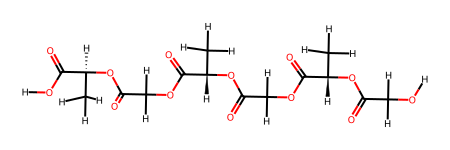

In [4]:
# Build a short linear chain using Swiftpol
from swiftpol import build
from rdkit.Chem import AllChem
monomer_list = ['OC(=O)COI', 'C[C@@H](C(=O)[OH])OI']
reaction = AllChem.ReactionFromSmarts('[C:1][O:2][H:3].[I:4][O:5][C:6]>>[C:1][O:2][C:6].[H:3][O:5][I:4]')
chain = build.build_polymer(sequence = 'ABABAB',
                            monomer_list= monomer_list,
                            reaction = reaction)
chain

In [5]:
# Assign charges to the chain using Espaloma Charge
from swiftpol import parameterize
import warnings
warnings.filterwarnings('ignore')
parameterize.charge_polymer(polymer = chain, charge_scheme='espaloma')

array([ 7.77123098e-01, -4.94031485e-01,  9.09776653e-02, -7.33221202e-04,
       -5.82999941e-01, -4.66306951e-01,  1.24006633e-01,  1.24006633e-01,
        7.54409973e-01,  9.48170686e-02, -5.54363962e-01, -4.96664461e-01,
       -1.34297710e-01,  1.13536131e-01,  7.77123038e-01,  7.87098298e-02,
        7.87098298e-02,  7.87098298e-02, -7.33221202e-04, -5.82999941e-01,
       -4.66306951e-01,  1.24006633e-01,  1.24006633e-01,  7.54409973e-01,
        9.66779406e-02, -5.54363962e-01, -4.89754047e-01, -1.34297695e-01,
        1.13536131e-01,  7.82715086e-01,  7.87098298e-02,  7.87098298e-02,
        7.87098298e-02, -5.43020423e-01, -1.82934270e-03, -6.75435718e-01,
        9.41647331e-02,  9.41647331e-02, -1.31069820e-01,  8.01335160e-01,
        1.16298985e-01,  7.87098224e-02,  7.87098224e-02,  7.87098224e-02,
       -5.08667107e-01, -6.55341144e-01,  4.01869808e-01,  4.05642603e-01])

In [6]:
# Assign charges to the chain using NAGL
from swiftpol import parameterize
import warnings
warnings.filterwarnings('ignore')
parameterize.charge_polymer(polymer = chain, charge_scheme='NAGL')

array([ 0.64762634, -0.43224436,  0.10760575,  0.08914204, -0.50493377,
       -0.42829853,  0.0934106 ,  0.0934106 ,  0.64226109,  0.10114308,
       -0.50591015, -0.43019831, -0.109393  ,  0.10609206,  0.64873135,
        0.06287562,  0.06287562,  0.06287562,  0.08891593, -0.50707715,
       -0.42829853,  0.0934106 ,  0.0934106 ,  0.64145047,  0.10263153,
       -0.50591015, -0.43222129, -0.1102319 ,  0.10524486,  0.63753927,
        0.06287562,  0.06287562,  0.06287562, -0.49706223,  0.09857142,
       -0.57114362,  0.06679461,  0.06679461, -0.11229469,  0.63341594,
        0.10720658,  0.06354057,  0.06354057,  0.06354057, -0.52068233,
       -0.6018039 ,  0.45037681,  0.41464234])

Text(0, 0.5, 'Espaloma')

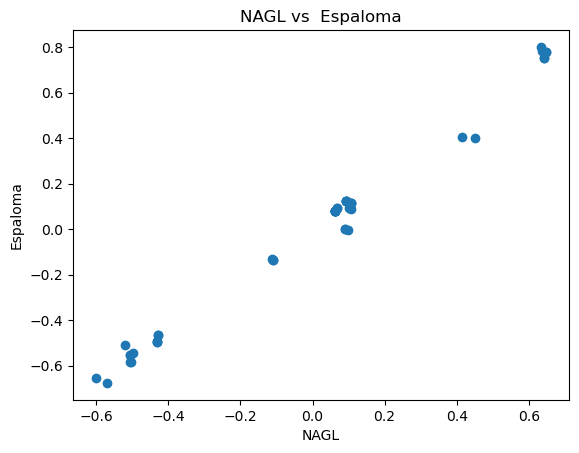

In [7]:
# Compare charges
import matplotlib.pyplot as plt
plt.scatter(parameterize.charge_polymer(polymer = chain, charge_scheme='NAGL'), 
            parameterize.charge_polymer(polymer = chain, charge_scheme='espaloma'))
plt.title('NAGL vs  Espaloma')
plt.xlabel('NAGL')
plt.ylabel('Espaloma')

In [11]:
# Build a PLGA system
from rdkit.Chem import AllChem
polymer = build.polymer_system(monomer_list = ['OC(=O)COI', 'C[C@@H](C(=O)[OH])OI'],
                               reaction = AllChem.ReactionFromSmarts('[C:1][O:2][H:3].[I:4][O:5][C:6]>>[C:1][O:2][C:6].[H:3][O:5][I:4]'),
                               length_target=10,
                               num_chains = 5,
                               blockiness_target=1.0,
                               perc_A_target=50, 
                               copolymer=True)
polymer

System built!, size = 5


In [12]:
# Calculate the polydispersity index of the PLGA system
PDI = build.PDI(polymer.chain_rdkit)[0]
print('PDI = ', PDI)

PDI =  5.0


In [13]:
# Calculate the blockiness of the sequence
from swiftpol import demo
mean_blockiness, G_block_length, L_block_length = demo.blockiness_PLGA(sequence='LLGG')
print("Average chain blockiness =", round(mean_blockiness,1))
print("G Block length =", round(G_block_length))
print("L Block length =", round(L_block_length))

Average chain blockiness = 1.0
G Block length = 2
L Block length = 2


## Ensemble Build

In [16]:
# Create a new system
x = build.polymer_system(monomer_list = ['OC(=O)COI', 'C[C@@H](C(=O)[OH])OI'],
                         reaction = AllChem.ReactionFromSmarts('[C:1][O:2][H:3].[I:4][O:5][C:6]>>[C:1][O:2][C:6].[H:3][O:5][I:4]'),
                         length_target=20,
                         num_chains = 1,
                         blockiness_target=1.0,
                         perc_A_target=75, 
                         copolymer=True)
print('Actual lactide conc. = ', round(x.A_actual,2))
print('length range = ', x.min_length, '-', x.max_length)
print("Polydispersity Index = ", round(x.PDI,3))
print("Average chain blockiness =", x.mean_blockiness)

System built!, size = 1
Actual lactide conc. =  80.0
length range =  20 - 20
Polydispersity Index =  1.0
Average chain blockiness = 1.0


In [17]:
# Inspect the first chain in our system
x.generate_conformers()
x.chains[0].visualize(backend='nglview')

NGLWidget()

In [19]:
# Charge the PLGA system using NAGL 
x.charge_system('NAGL')

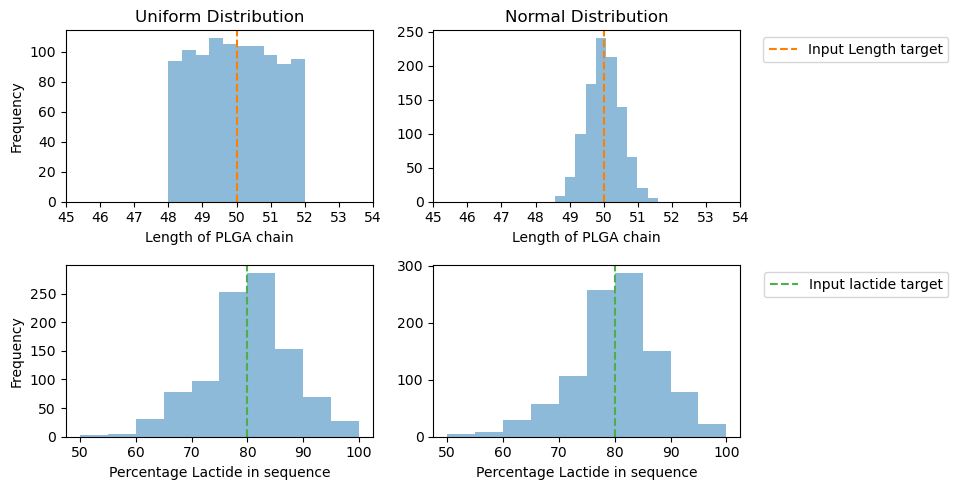

In [13]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
# Effect of a normal distribution
perc_lactide_target, length_target, num_chains = 80, 50, 1000 # specify input parameters

# Generate lengths and sequences without a normal distribution applied
lengths_1 = []
lac_1 = []
chains_1 = []
for i in range(num_chains):
    length_actual = np.random.uniform(int(round(length_target*0.95)),int(round(length_target*1.05)))
    lengths_1.append(length_actual)
    sequence = reduce(lambda x, y: x + y, np.random.choice(['LL', 'GG'], size=(int(length_actual/2),), p=[perc_lactide_target/100,1-(perc_lactide_target/100)]))
    actual_lac = sequence.count('L')
    lac_1.append((actual_lac/len(sequence)*100))
    chains_1.append(demo.build_PLGA_ring(sequence=sequence, terminal ='hydroxyl')[0])


# Generate lengths and sequences with a normal distribution applied
lengths_2 = []
lac_2 = []
mw_list2 = []
chains_2 = []
for i in range(num_chains):
    length_actual = np.random.normal(length_target, 0.5)
    lengths_2.append(length_actual)
    sequence = reduce(lambda x, y: x + y, np.random.choice(['LL', 'GG'], size=(int(length_actual/2),), p=[perc_lactide_target/100,1-(perc_lactide_target/100)]))
    actual_lac = sequence.count('L')
    lac_2.append((actual_lac/len(sequence)*100))
    chains_2.append(demo.build_PLGA_ring(sequence=sequence, terminal ='hydroxyl')[0])

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0,0].hist(lengths_1, rwidth=1, alpha=0.5)
axs[0,0].set_xticks(range(int(round(length_target*0.9)),int(round(length_target*1.1))))
axs[0,0].set_xlabel('Length of PLGA chain')
axs[0,0].set_ylabel('Frequency')
axs[0,0].axvline(length_target, color='#ff7f00', linestyle='--', label='Input Length target')
axs[0,0].set_title('Uniform Distribution')

axs[0,1].hist(lengths_2, rwidth=1, alpha=0.5)
axs[0,1].set_xticks(range(int(round(length_target*0.9)),int(round(length_target*1.1))))
axs[0,1].set_xlabel('Length of PLGA chain')
axs[0,1].axvline(length_target, color='#ff7f00', linestyle='--', label='Input Length target')
axs[0,1].set_title('Normal Distribution')
axs[0,1].legend(bbox_to_anchor=(1.7, 1.0))

axs[1,0].hist(lac_1, alpha=0.5)
axs[1,0].set_xlabel('Percentage Lactide in sequence')
axs[1,0].set_ylabel('Frequency')
axs[1,0].axvline(perc_lactide_target, color='#4daf4a', linestyle='--', label='Input lactide target')

axs[1,1].hist(lac_2, alpha=0.5)
axs[1,1].set_xlabel('Percentage Lactide in sequence')
axs[1,1].axvline(perc_lactide_target, color='#4daf4a', linestyle='--', label='Input lactide target')

plt.legend(bbox_to_anchor=(1.7, 1.0))
plt.tight_layout()
plt.show()

## Resomer® LG 756 S

Building a [commerically available PLGA](https://www.sigmaaldrich.com/GB/en/product/aldrich/719927) molecule with input specification based on quality assurance parameters

Blockiness value from literature:
Sun J, et al. 2022 | Characterization of commercial PLGAs by NMR spectroscopy. Drug Deliv Transl Res. 


In [21]:
# Create a system
import time
from swiftpol import demo
start = time.process_time()
x = demo.PLGA_system(75, 50, 1.7, 'ester', 3)
end = time.process_time()
print('Actual lactide conc. = ', round(x.lactide_actual,2))
print('length = ', x.min_length)
print("Polydispersity Index = ", round(x.PDI,3))
print("Average chain blockiness =", round(x.mean_blockiness,1))
print("Average Molecular Weight =", x.mol_weight_average)
print("G Block length =", round(x.G_block_length))
print("L Block length =", round(x.L_block_length))
#Print time taken to build chain
time_elapsed = end - start
print('Build time -', round(time_elapsed,3), 's')

System built!, size = 3
Actual lactide conc. =  76.0
length =  50
Polydispersity Index =  1.678
Average chain blockiness = 1.6
Average Molecular Weight = 3464.89
G Block length = 3
L Block length = 10
Build time - 0.643 s


In [22]:
# Generate charges and conformers
x.charge_system()
x.generate_conformers()